# Predicting California House Prices using an Artificial Neural Network (ANN)

This notebook demonstrates how to build and train an Artificial Neural Network (ANN) using TensorFlow/Keras to predict median house prices in California based on the California Housing dataset available in scikit-learn.

**Objective:**
Use an ANN model to predict median house prices in California based on input features like population, income, house age, and location-based statistics from the California Housing dataset.

**Model Requirements:**
- 1 input layer (8 features)
- At least 2 hidden layers (e.g., 64 and 32 neurons)
- 1 output neuron
- ReLU activation function for hidden layers
- MSE as the loss function
- Adam optimizer

**Evaluation Metrics:**
- R² score
- Mean Squared Error (MSE)

## 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns # Often useful for better-looking plots

## 2. Loading the Dataset

We load the California Housing dataset using `Workspace_california_housing` from `sklearn.datasets`.

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()

# Create a pandas DataFrame for features (X) and a Series for the target (y)
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='median_house_value')

print("Dataset loaded successfully.")
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature names:", housing.feature_names)
# Display the first few rows of the features and target
print("\nFeatures (first 5 rows):\n", X.head())
print("\nTarget (first 5 values):\n", y.head())

Dataset loaded successfully.
Features shape: (20640, 8)
Target shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Features (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (first 5 values):
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: median_house_value, dtype: float64


## 3. Data Preprocessing

Neural networks generally perform better when input features are scaled. We will split the data into training and testing sets and then use `StandardScaler` to standardize the features.

In [3]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Data split into training and testing sets.
Training features shape: (16512, 8)
Testing features shape: (4128, 8)
Training target shape: (16512,)
Testing target shape: (4128,)


In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler (important!)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")
print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled testing features shape:", X_test_scaled.shape)


Features scaled successfully.
Scaled training features shape: (16512, 8)
Scaled testing features shape: (4128, 8)


## 4. Building the ANN Model

We define a Sequential Keras model with the specified architecture:
- A `Dense` layer with 64 neurons and ReLU activation, serving as the first hidden layer and implicitly the input layer (by setting `input_shape`). The `input_shape` is the number of features in our scaled data.
- A second `Dense` layer with 32 neurons and ReLU activation.
- An output `Dense` layer with 1 neuron for predicting the continuous house price. No activation function is typically used in the output layer for regression tasks.

The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. We also track MSE as a metric during training.

In [5]:
# Get the number of features
n_features = X_train_scaled.shape[1]

# Define the Sequential model
model = Sequential([
    # Input layer and First Hidden layer
    Dense(64, activation='relu', input_shape=(n_features,)),
    # Second Hidden layer
    Dense(32, activation='relu'),
    # Output layer for regression
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', # Adam optimizer
              loss='mse',       # Mean Squared Error loss function
              metrics=['mse'])  # Track MSE during training

# Print the model summary to see the architecture
print("ANN Model Architecture:")
model.summary()

ANN Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training the Model

We train the model using the scaled training data (`X_train_scaled`) and the corresponding target values (`y_train`). We specify the number of epochs (iterations over the dataset) and the batch size (number of samples per gradient update). A validation split is used to monitor the model's performance on a portion of the training data that is not used for training.

In [6]:
# Train the model
# We use a validation split to monitor performance on unseen data during training
print("\nStarting model training...")
history = model.fit(X_train_scaled, y_train,
                    epochs=100,         # Number of training epochs
                    batch_size=64,      # Number of samples per gradient update
                    validation_split=0.2, # Split 20% of training data for validation
                    verbose=1)          # Show training progress
print("Model training finished.")


Starting model training...
Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3237 - mse: 2.3237 - val_loss: 0.6257 - val_mse: 0.6257
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5490 - mse: 0.5490 - val_loss: 0.4844 - val_mse: 0.4844
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4478 - mse: 0.4478 - val_loss: 0.4331 - val_mse: 0.4331
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4009 - mse: 0.4009 - val_loss: 0.4054 - val_mse: 0.4054
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3754 - mse: 0.3754 - val_loss: 0.4241 - val_mse: 0.4241
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3552 - mse: 0.3552 - val_loss: 0.3759 - val_mse: 0.3759
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3337 - mse: 0.3337 - val_loss: 0.3757 - val_mse: 0.3757
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3358 - mse: 0.3358 - val_loss: 0.3675 - val_mse: 0.3675
Epoch 9/100
207/207 

## 6. Evaluating the Model

After training, we evaluate the model's performance on the unseen test dataset (`X_test_scaled`, `y_test`) using the specified metrics: MSE and R² score.

In [7]:
# Evaluate the model on the test data
print("\nEvaluating model on test data...")
loss, mse = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Test Mean Squared Error (MSE): {mse:.4f}')


Evaluating model on test data...
Test Mean Squared Error (MSE): 0.2782


In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

print(f'Test R^2 Score: {r2:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R^2 Score: 0.7877


## 7. Visualizing Performance and Training History

Visualizing the training history and the model's predictions versus the actual values can provide further insights into its performance.

### 7.1 Training and Validation Loss Over Epochs

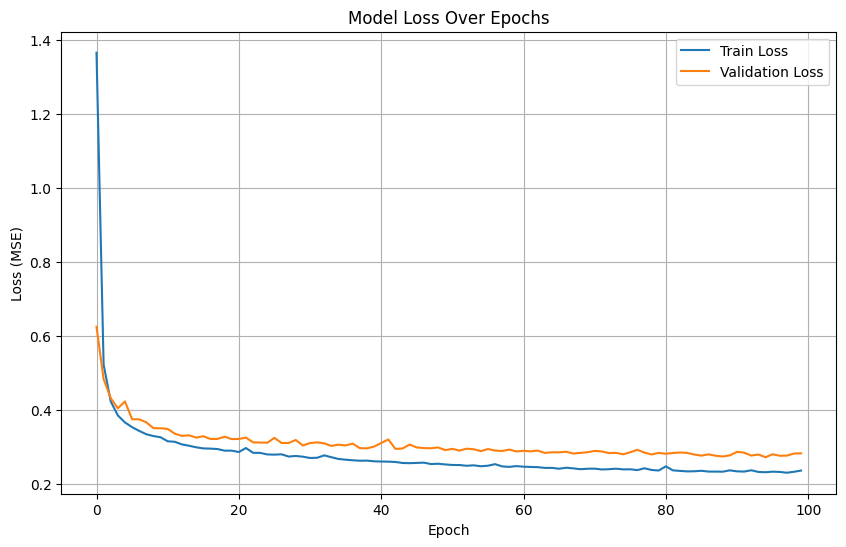

In [10]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### 7.2 Actual vs. Predicted Prices

A scatter plot comparing the actual house prices from the test set (`y_test`) against the prices predicted by the model (`y_pred`). Points close to the diagonal line indicate accurate predictions.

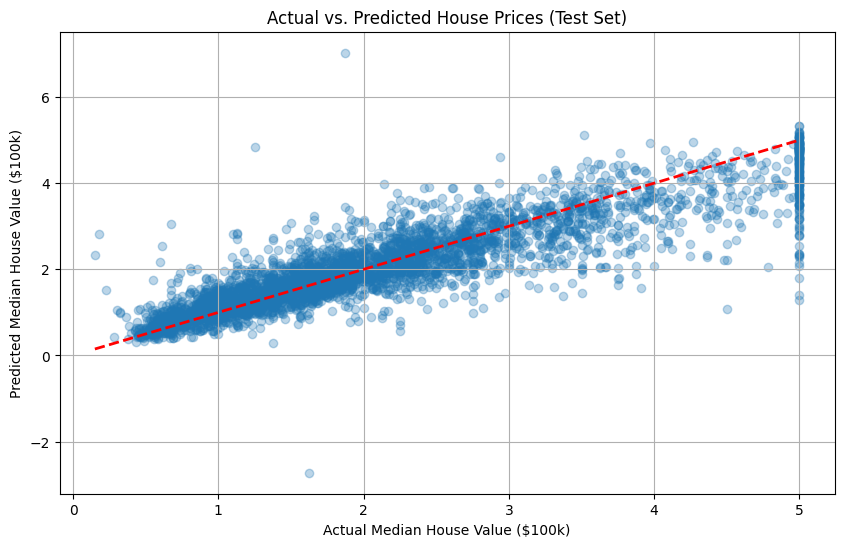

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3) # Use alpha to show density of points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Red dashed line for perfect prediction
plt.xlabel('Actual Median House Value ($100k)')
plt.ylabel('Predicted Median House Value ($100k)')
plt.title('Actual vs. Predicted House Prices (Test Set)')
plt.grid(True)
plt.show()

### 7.3 Distribution of Residuals

Residuals are the differences between the actual values and the predicted values ($ Actual - Predicted $). Plotting their distribution helps understand the nature of the model's errors. Ideally, residuals should be randomly distributed around zero.

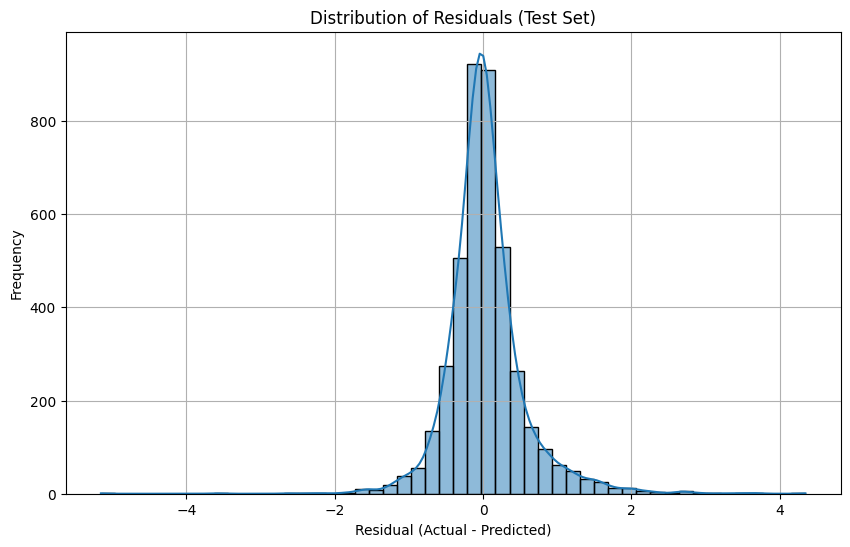

In [12]:
# Calculate residuals
# y_pred comes as a 2D array (n_samples, 1), flatten it for residual calculation with 1D y_test
residuals = y_test - y_pred.flatten()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True) # Use seaborn for a nice histogram with KDE
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 8. Conclusion and Further Steps

This notebook successfully implemented and trained an Artificial Neural Network to predict median house prices in California using the specified architecture, loss function, and optimizer. The model's performance was evaluated using MSE and R² on the test set, and we visualized the training progress and prediction quality.

The plots help confirm the model's performance: the loss decreases during training, the actual vs. predicted plot shows a reasonable linear relationship (though with scatter), and the residuals plot indicates the distribution of errors.

Further steps to potentially improve the model's performance include:
- **Hyperparameter Tuning:** Experiment with different numbers of layers, neurons per layer, activation functions, learning rates, epochs, and batch sizes.
- **Regularization:** Add techniques like Dropout or L1/L2 regularization to prevent overfitting, especially if the validation loss plot shows signs of divergence.
- **Cross-Validation:** Use k-fold cross-validation for a more robust evaluation of the model's performance.
- **Feature Engineering:** Create new features from existing ones that might be more informative.
- **Different Architectures:** Explore more complex ANN architectures or other types of models.